In [12]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.applications.vgg16 import VGG16 as cnn
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras import layers
from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, Input, MaxPool2D
from tensorflow.keras import Model
from keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'
# len(os.listdir('/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA'))

In [14]:
ls /kaggle/input/chest-xray-pneumonia/chest_xray/test

NORMAL/  PNEUMONIA/


In [15]:
nb_train_samples = len(os.listdir(train_dir + '/NORMAL')) + len(os.listdir(train_dir + '/PNEUMONIA'))
print(nb_train_samples)
nb_val_samples  = len(os.listdir(val_dir + '/NORMAL')) + len(os.listdir(val_dir + '/PNEUMONIA'))
print(nb_val_samples)
nb_test_samples  = len(os.listdir(test_dir + '/NORMAL')) + len(os.listdir(val_dir + '/PNEUMONIA'))
print(nb_test_samples)

5216
16
242


In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                      shear_range=0.2,zoom_range=0.2,
                                      horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale=1./ 255)

batch_size = 10
img_width = 150
img_height = 150

train_generator = train_datagen.flow_from_directory(train_dir,batch_size = batch_size,
                                                    class_mode = 'binary', 
                                                    target_size =(img_width, img_height))

val_generator = val_datagen.flow_from_directory(val_dir,batch_size = batch_size,
                                                    class_mode = 'binary', 
                                                    target_size =(img_width, img_height))



test_generator = test_datagen.flow_from_directory(test_dir,batch_size=batch_size,                                              
                                                class_mode='binary',
                                                target_size=(img_width, img_height))



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


x_train,y_train=train_generator.next()
x_test,y_test=test_generator.next(624)

In [17]:
from pathlib import Path
# Define path to the data directory
data_dir = Path('../input/chest-xray-pneumonia/chest_xray/chest_xray')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'train'
import cv2
from keras.utils import to_categorical
# Path to validation directory
val_dir = data_dir / 'val'

# Path to test directory
test_dir = data_dir / 'test'

#Get the path to the sub-directories
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

# List that are going to contain validation images data and the corresponding labels
valid_data = []
valid_labels = []
import numpy as np

# Some images are in grayscale while majority of them contains 3 channels. So, if the image is grayscale, we will convert into a image with 3 channels.
# We will normalize the pixel values and resizing all the images to 224x224 

# Normal cases
for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (150,150))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150,150)).astype(np.float32)/255.0
    label = to_categorical(0, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
                      
# Pneumonia cases        
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (150,150))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.0
    label = to_categorical(1, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
    
# Convert the list into numpy arrays
x_train = np.array(valid_data)
y_train = np.array(valid_labels)


In [18]:
x_train.shape

(5216, 150, 150, 3)

In [19]:
from pathlib import Path
# Define path to the data directory
data_dir = Path('../input/chest-xray-pneumonia/chest_xray/chest_xray')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'train'
import cv2
from keras.utils import to_categorical
# Path to validation directory
val_dir = data_dir / 'val'

# Path to test directory
test_dir = data_dir / 'test'

#Get the path to the sub-directories
normal_cases_dir = test_dir / 'NORMAL'
pneumonia_cases_dir = test_dir / 'PNEUMONIA'

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')

# List that are going to contain validation images data and the corresponding labels
valid_data = []
valid_labels = []
import numpy as np



# Normal cases
for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (150,150))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (150,150)).astype(np.float32)/255.0
    label = to_categorical(0, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
                      
# Pneumonia cases        
for img in pneumonia_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (150,150))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.0
    label = to_categorical(1, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
    
# Convert the list into numpy arrays
x_test = np.array(valid_data)
y_test = np.array(valid_labels)


In [20]:

y_test.shape

(624, 2)

In [21]:
in_shape = Input(shape=(150,150,3))
model = cnn(weights = 'imagenet',input_shape=(150,150,3), include_top=False)

model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Now we will freeze all layers of our pretrained model

In [22]:
for layer in model.layers:
      layer.trainable = False

In [23]:

last_output = model.output

In [24]:


# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)               
# Add a final sigmoid layer for classification
x = layers.Dense(2, activation='softmax')(x)           

model = Model(model.input, x) 

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

model=cnn(weights=None, include_top=True,classes=2,input_shape=(150,150,3))
model.summary()

In [25]:
#sgd=SGD(lr=0.01,momentum=0.9,nesterov=True)
#model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [30]:
history=model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=5, batch_size=10)

Train on 5216 samples, validate on 624 samples
Epoch 1/5
5216/5216 [==============================] - 14s 3ms/sample - loss: 0.0830 - acc: 0.9705 - val_loss: 0.6188 - val_acc: 0.8189
Epoch 2/5
5216/5216 [==============================] - 13s 3ms/sample - loss: 0.0561 - acc: 0.9780 - val_loss: 1.3692 - val_acc: 0.7179
Epoch 3/5
5216/5216 [==============================] - 13s 3ms/sample - loss: 0.0442 - acc: 0.9824 - val_loss: 0.6488 - val_acc: 0.8301
Epoch 4/5
5216/5216 [==============================] - 13s 3ms/sample - loss: 0.0404 - acc: 0.9864 - val_loss: 1.4840 - val_acc: 0.7147
Epoch 5/5
5216/5216 [==============================] - 13s 3ms/sample - loss: 0.0340 - acc: 0.9887 - val_loss: 0.9844 - val_acc: 0.7837


history = model.fit_generator(
            train_generator,
            validation_data = val_generator,
            steps_per_epoch = nb_train_samples // batch_size,
            epochs = 5,
            validation_steps = nb_val_samples // batch_size,
            verbose = 1)


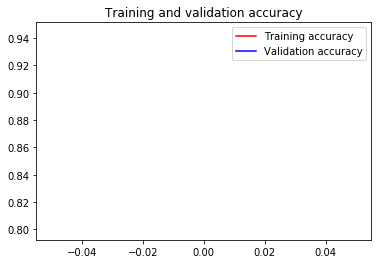

<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()


# evaluate the model
scores = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


In [29]:
model.save("/kaggle/working/mobilenetmodel.h5")

score = model.evaluate(x_test, y_test, verbose=0)
print(score[1]*100)

In [31]:
from sklearn import metrics
def softmax_c(z):
    assert len(z.shape) == 2
    s = np.max(z, axis=1)
    s = s[:, np.newaxis]
    e_x = np.exp(z - s)
    div = np.sum(e_x, axis=1)
    div = div[:, np.newaxis] 
    return e_x / div

In [34]:
from keras import backend as K

def prepare_softtargets(model,X):
    inp = model.input                                           # input placeholder
    outputs = []
    for layer in model.layers[:]:
        if layer.name == 'flatten_1':
            outputs.append(layer.output)
        if layer.name == 'dense_2':
            outputs.append(layer.output)
            
    functor = K.function([inp]+ [K.learning_phase()], outputs ) # evaluation function
    layer_outs = functor([X, 1])
    return np.array(layer_outs[0]) , np.array(layer_outs[1])

In [37]:
logit_out = []
lastconv_out = []
for i in range(0,10):
    """l,l2 =  ( prepare_softtargets(model,x_train[i*100:(i+1)*100])
    lastconv_out.append(l)
    logit_out.append(l2)"""
    l,l2 = prepare_softtargets(model,x_train[i*521:(i+1)*521])
    lastconv_out.append(l)
    logit_out.append(l2)

# lastconv_out.shape , logit_out.shape
lastconv_out = np.array(lastconv_out)
logit_out = np.array(logit_out)
lastconv_out = lastconv_out.reshape((5210 , 8192))
logit_out = logit_out.reshape((5210 , 1024))
print (lastconv_out.shape)
print (logit_out.shape)

(5210, 8192)
(5210, 1024)


In [40]:

test_lastconv_out = []
test_logit_out = []

for i in range(0,10):
    print ("Batch # : ",i)
    l,l2 =  prepare_softtargets(model,x_test[i*62:(i+1)*62])
    test_lastconv_out.append(l)
    test_logit_out.append(l2)

# lastconv_out.shape , logit_out.shape
test_lastconv_out = np.array(test_lastconv_out)
test_logit_out = np.array(test_logit_out)

test_lastconv_out = test_lastconv_out.reshape((620,8192))
test_logit_out = test_logit_out.reshape((620,1024))

print (test_lastconv_out.shape)
print (test_logit_out.shape)

Batch # :  0
Batch # :  1
Batch # :  2
Batch # :  3
Batch # :  4
Batch # :  5
Batch # :  6
Batch # :  7
Batch # :  8
Batch # :  9
(620, 8192)
(620, 1024)


In [41]:
import keras
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
for HiddenNeuron in [1,2,10,100]:
    student_model = Sequential()
    student_model.add(Dense(HiddenNeuron,input_dim=8192,activation='relu'))
    student_model.add(Dropout(0.2))
    student_model.add(Dense(1024))

    student_model.compile(loss='mse',
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    student_model.fit(lastconv_out, logit_out,nb_epoch=40,verbose=0)
#     student_model.save_weights("student_weights_"+str(HiddenNeuron)+"hidden_0.5_dropout.h5")
    scores = student_model.evaluate(test_lastconv_out,test_logit_out)
    print(f"Test Accuracy: {scores[1]*100}")
    # Compression Rate from Number of Parameters Reduced
    print ("HiddenNeurons : " , HiddenNeuron)
    print ("Initial Model Parameters : " , model.count_params())
    print ("Compressed Model parameters: ", student_model.count_params())
    
    compressionRate = model.count_params() / np.float(student_model.count_params())
    print ("Compression Rate : " , compressionRate)
    
    pred = student_model.predict(test_lastconv_out)
    probs = softmax_c(pred)
    pred_classes = np.argmax(probs,axis=1)
    accuracy_student = metrics.accuracy_score(y_pred=np.argmax(pred,axis=1),y_true=np.argmax(test_logit_out,axis=1))
    #accuracy_student = metrics.accuracy_score(y_pred=pred_classes,y_true=np.argmax(test_logit_out,axis=1))
    print ("Accuracy : " , accuracy_student)
                            
    out = {
        "HiddenNeuron" :    HiddenNeuron,
        "compressionRate" : compressionRate,
        "nparams_student" : student_model.count_params(),
        "accuracy_student": accuracy_student
    }
    
  

NameError: name 'Sequential' is not defined